In [86]:
import pandas as pd

In [87]:
df = pd.read_csv("tvmarketing.csv")

In [88]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [89]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [91]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [92]:
df.columns

Index(['TV', 'Sales'], dtype='object')

<Axes: xlabel='TV', ylabel='Sales'>

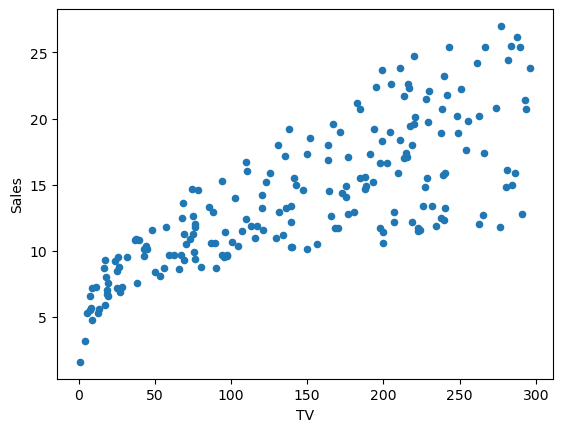

In [93]:
df.plot(x='TV',y='Sales',kind='scatter')

In [94]:
x=df['TV']
x=x.values.reshape(-1,1)
type(x)

numpy.ndarray

In [95]:
x.shape

(200, 1)

In [96]:
y=df['Sales']

type(y)

pandas.core.series.Series

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x_scaled,y ,train_size=0.8 , random_state=0)

In [99]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [100]:
model.intercept_

7.324699226281473

In [101]:
model.coef_

array([13.60450339])

## equation <br>
$ 7.324699226281473 + 13.60450339 \times TV $

In [102]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_predict)
mse

10.186181934530216

In [104]:
r_square_score= r2_score(y_test,y_predict)
r_square_score

0.6763151577939721

In [106]:
import matplotlib.pyplot as plt

In [107]:
y_test.shape

(40,)

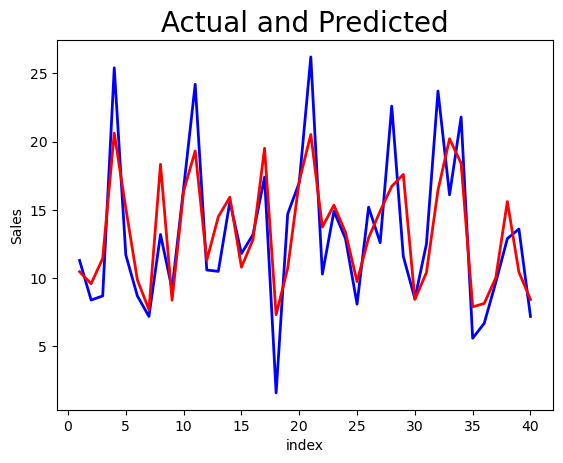

In [116]:
c=[i for i in range(1,41,1)]
plt.plot(c,y_test,color='b', linewidth=2 ,linestyle='-')
plt.plot(c,y_predict,color='r', linewidth=2 ,linestyle='-')
plt.title('Actual and Predicted', fontsize=20)
plt.xlabel('index')
plt.ylabel('Sales')
plt.show()

Text(0, 0.5, 'Sales')

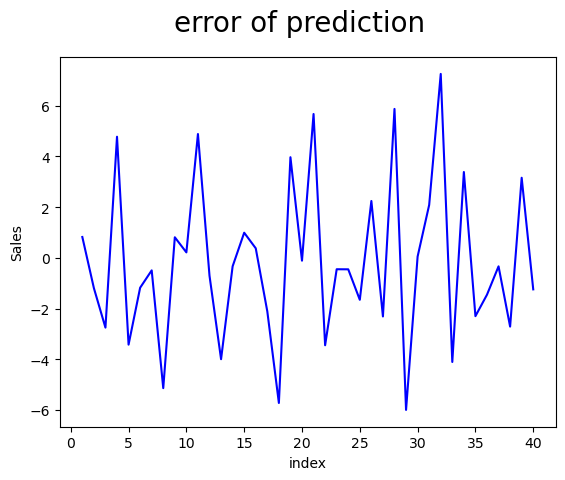

In [120]:
c=[i for i in range(1,41)]
fig=plt.figure()
plt.plot(c,y_test-y_predict,color='b')
fig.suptitle("Error of prediction",fontsize=20)
plt.xlabel('index')
plt.ylabel('Sales')